<a href="https://colab.research.google.com/github/sergioc248/apuntes-inteligencia-artificial/blob/main/Apuntes_EDA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="cyan">Cuaderno 4: Tratamiento de Valores Atípicos (Outliers)
* Los modelos sensibles (regresión lineal, SVM, redes neuronales) pueden generar predicciones sesgadas debido a la influencia de estos valores.
* Los modelos basados en árboles (árboles de decisión, Random Forest) son más robustos, pero un manejo adecuado sigue siendo importante para mejorar la calidad general del análisis.


---

## <font color="cyan">4.2 Detección de Valores Atípicos
Existen varios métodos para detectar outliers:

### <font color="lime">4.2.1 Boxplot (Diagrama de Cajas)
El boxplot es una herramienta gráfica basada en el rango intercuartílico (IQR).
* Se consideran valores atípicos aquellos que están fuera del rango:

Bigote bajo (el primer cuartil)= $Q1−1.5×IQR$

Bogote alto (el tercer cuartil):$(Q3+1.5×IQR]$

donde Q1 es el primer cuartil y Q3 es el tercer cuartil.



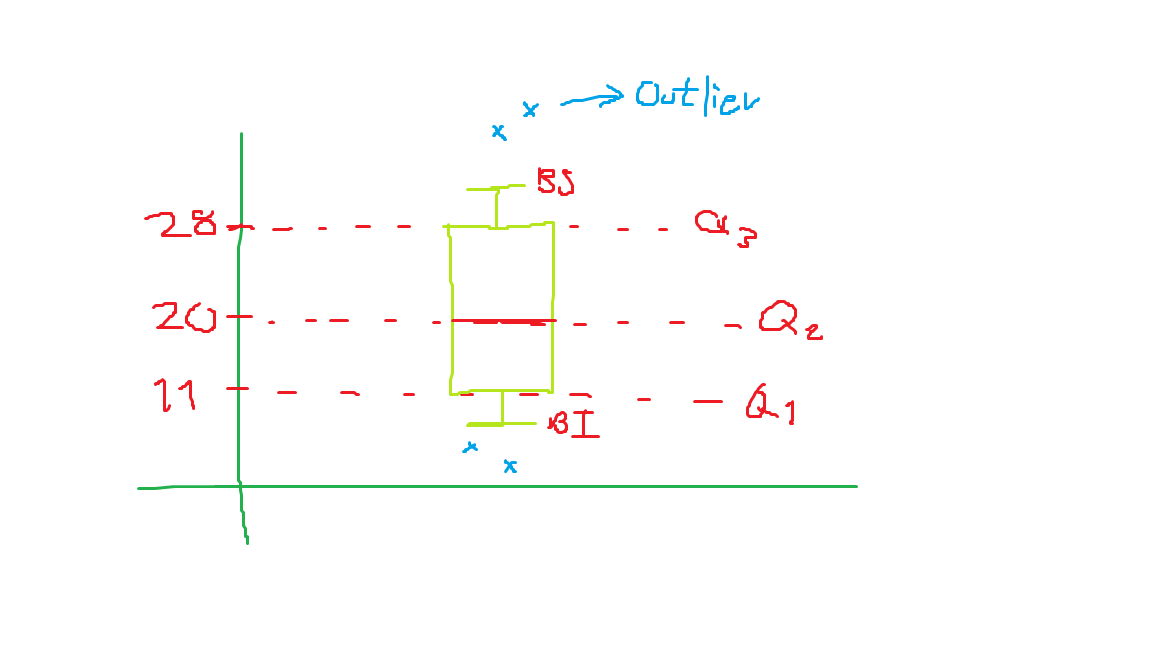

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset simulado
np.random.seed(42)
data = pd.DataFrame({
    "Edad": np.random.normal(30, 10, 100).tolist() + [100, 120],  # Valores atípicos
    "Ingresos": np.random.normal(50000, 15000, 100).tolist() + [200000, 250000]
})




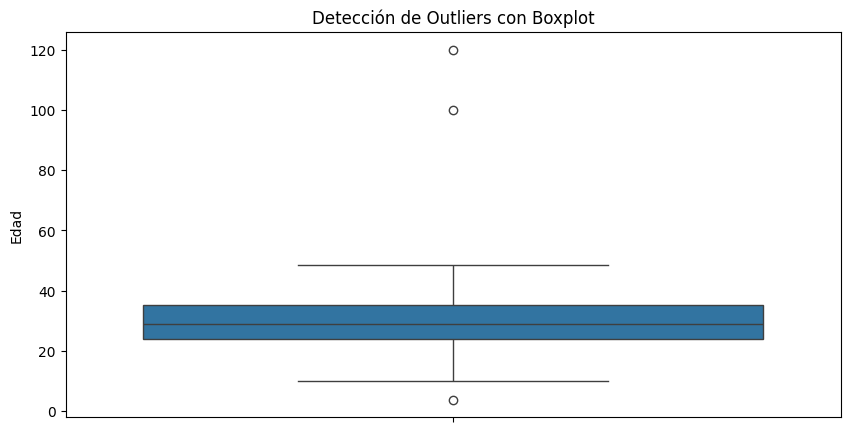

In [ ]:
# Visualizar con boxplot las edades
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y="Edad")
plt.title("Detección de Outliers con Boxplot")
plt.show()



> Podemos ver que hay un outlier por debajo del bigote inf. y dos outliers por encima del bigote sup.



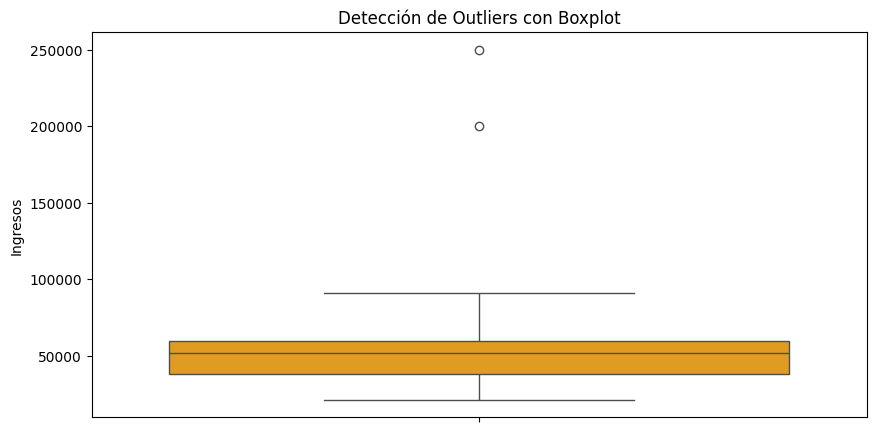

In [ ]:
# Visualizar con boxplot los ingresos
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y="Ingresos", color= "orange")
plt.title("Detección de Outliers con Boxplot")
plt.show()

**Metodo para ver los estadísticos (** *importantemente, los cuartiles* **) del dataframe**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,102.0,30.550524,14.502355,3.802549,24.089491,29.061708,35.091291,120.0
Ingresos,102.0,53759.381182,28376.604542,21218.431771,38037.180875,51900.323533,59239.471764,250000.0


In [ ]:
# Rangos intercuartiles
RIQEdad = data["Edad"].quantile(0.75) - data["Edad"].quantile(0.25)
RIQIngresos = data["Ingresos"].quantile(0.75) - data["Ingresos"].quantile(0.25)
# Bigotes
BSEdad = data["Edad"].quantile(0.75) + (1.5 * RIQEdad)
BSIngresos = data["Ingresos"].quantile(0.75) + (1.5 * RIQIngresos)
BIEdad = data["Edad"].quantile(0.25) - (1.5 * RIQEdad)
BIIngresos = data["Ingresos"].quantile(0.25) - (1.5 * RIQIngresos)

print("Rango intercuartílico de Edad:", RIQEdad)
print("Rango intercuartílico de Ingresos:", RIQIngresos)
print()
print("Bigote superior de Edad:", BSEdad)
print("Bigote inferior de Edad:", BIEdad)
print()
print("Bigote superior de Ingresos:", BSIngresos)
print("Bigote inferior de Ingresos:", BIIngresos)

Rango intercuartílico de Edad: 11.001800128371716
Rango intercuartílico de Ingresos: 21202.290889111442

Bigote superior de Edad: 51.59399132343582
Bigote inferior de Edad: 7.586790809948955

Bigote superior de Ingresos: 91042.9080977745
Bigote inferior de Ingresos: 6233.744541328731


### <font color="blue">4.2.2 Z-Score (Puntuación Estándar)

El Z-Score mide cuántas desviaciones estándar se encuentra un dato con respecto a la media.
* Un valor atípico se define como aquel cuya puntuación Z es mayor que un umbral (generalmente 3 o -3).


In [ ]:
from scipy.stats import zscore

# Calcular Z-Score
data["Edad_Zscore"] = zscore(data["Edad"])
data["Ingresos_Zscore"] = zscore(data["Ingresos"])

# Filtrar outliers
outliers = data[(data["Edad_Zscore"].abs() > 3) | (data["Ingresos_Zscore"].abs() > 3)]
print("\nOutliers detectados con Z-Score:")
print(outliers)



Outliers detectados con Z-Score:
      Edad  Ingresos  Edad_Zscore  Ingresos_Zscore
100  100.0  200000.0     4.812490         5.179013
101  120.0  250000.0     6.198387         6.949729


### <font color="blue">4.2.3  Puntuaciones IQR (Rango Intercuartílico)
El método IQR utiliza el rango entre el primer y tercer cuartil para identificar valores fuera de los límites.


In [ ]:
# Cálculo del IQR
Q1 = data["Edad"].quantile(0.25)
Q3 = data["Edad"].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_iqr = data[(data["Edad"] < lower_bound) | (data["Edad"] > upper_bound)]
print("\nOutliers detectados con IQR:")
print(outliers_iqr)



Outliers detectados con IQR:
           Edad      Ingresos  Edad_Zscore  Ingresos_Zscore
74     3.802549   54150.36199    -1.853497         0.013846
100  100.000000  200000.00000     4.812490         5.179013
101  120.000000  250000.00000     6.198387         6.949729


## <font color="red">4.3 Estrategias para Manejar Outliers
Una vez identificados los valores atípicos, es importante decidir cómo manejarlos:
### <font color="blue">4.3.1 Eliminación de Outliers
Esta estrategia elimina directamente las filas con valores atípicos. Es útil cuando los valores extremos son errores de medición o no tienen relevancia en el análisis.


In [ ]:
# Eliminar outliers basados en IQR
data_cleaned = data[(data["Edad"] >= lower_bound) & (data["Edad"] <= upper_bound)]
print("\nDatos después de eliminar outliers:")
print(data_cleaned)



Datos después de eliminar outliers:
         Edad      Ingresos  Edad_Zscore  Ingresos_Zscore
0   34.967142  28769.438869     0.306049        -0.885002
1   28.617357  43690.320159    -0.133959        -0.356589
2   36.476885  44859.282252     0.410666        -0.315191
3   45.230299  37965.840962     1.017233        -0.559318
4   27.658466  47580.714325    -0.200405        -0.218813
..        ...           ...          ...              ...
95  15.364851  55779.760696    -1.052289         0.071550
96  32.961203  36742.138457     0.167048        -0.602654
97  32.610553  52305.876589     0.142749        -0.051475
98  30.051135  50873.130777    -0.034605        -0.102215
99  27.654129  32855.445533    -0.200705        -0.740299

[99 rows x 4 columns]


### <font color="blue">4.3.2 Winsorización
Consiste en reemplazar los valores extremos por los límites inferior y superior del rango aceptable.

In [ ]:
# Winsorización
data["Edad_Winsorized"] = data["Edad"].clip(lower=lower_bound, upper=upper_bound)
print("\nDatos después de Winsorización:")
print(data[["Edad", "Edad_Winsorized"]])



Datos después de Winsorización:
           Edad  Edad_Winsorized
0     34.967142        34.967142
1     28.617357        28.617357
2     36.476885        36.476885
3     45.230299        45.230299
4     27.658466        27.658466
..          ...              ...
97    32.610553        32.610553
98    30.051135        30.051135
99    27.654129        27.654129
100  100.000000        51.593991
101  120.000000        51.593991

[102 rows x 2 columns]


### <font color="blue">4.3.3 Imputación de Outliers
Reemplaza los valores extremos con la media, mediana u otros métodos.


In [ ]:
# Reemplazar outliers con la mediana
edad_median = data["Edad"].median()
data["Edad_Imputed"] = data["Edad"].apply(lambda x: edad_median if (x < lower_bound or x > upper_bound) else x)
print("\nDatos después de imputar outliers:")
print(data[["Edad", "Edad_Imputed"]])



Datos después de imputar outliers:
           Edad  Edad_Imputed
0     34.967142     34.967142
1     28.617357     28.617357
2     36.476885     36.476885
3     45.230299     45.230299
4     27.658466     27.658466
..          ...           ...
97    32.610553     32.610553
98    30.051135     30.051135
99    27.654129     27.654129
100  100.000000     29.061708
101  120.000000     29.061708

[102 rows x 2 columns]


## <font color="red">4.4 Visualización Comparativa del Tratamiento


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


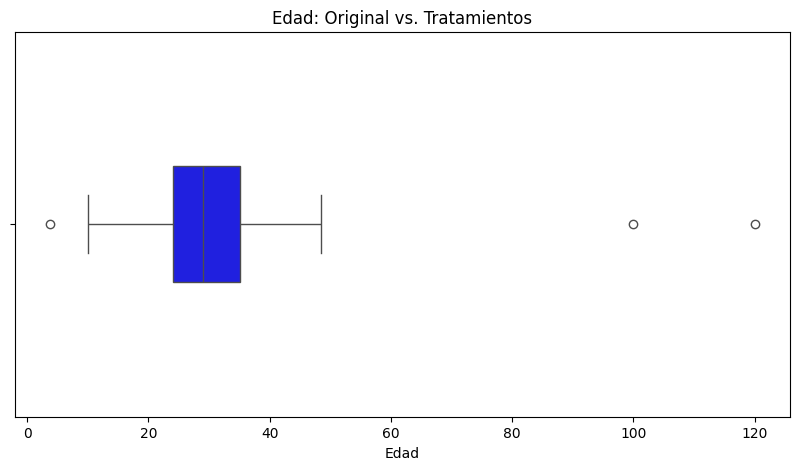

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


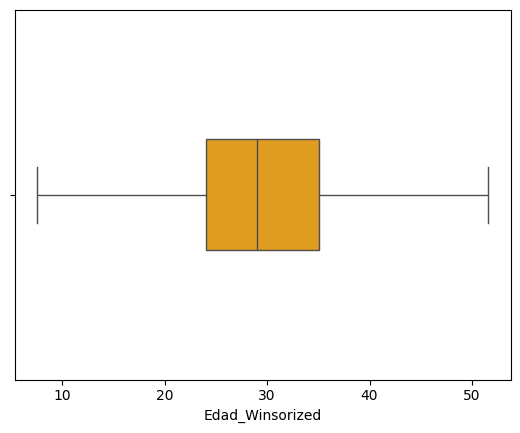

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


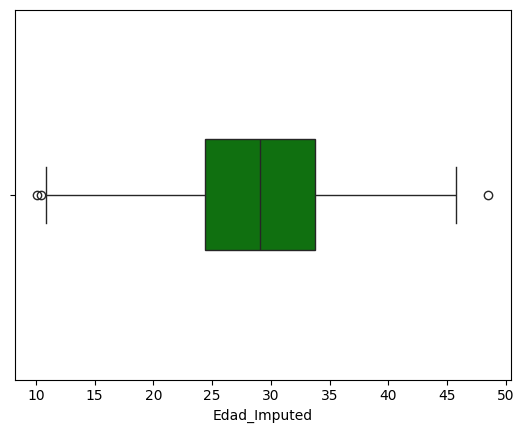

In [ ]:
# Visualizar resultados
plt.figure(figsize=(10, 5))

# Original
sns.boxplot(x=data["Edad"], color="blue", width=0.3, orient="v")
plt.title("Edad: Original vs. Tratamientos")
plt.show()

# Winsorización
sns.boxplot(x=data["Edad_Winsorized"], color="orange", width=0.3, orient="v")
plt.show()

# Imputación
sns.boxplot(x=data["Edad_Imputed"], color="green", width=0.3, orient="v")
plt.show()
